# Biodata
Nama: Sahrial Ihsani Ishak

Asal: Bengkulu


# Project Overview
Pada project Machine Learning kali ini saya mencoba membuat Sistem Rekomendasi pencarian buku berdasarkan preferensi pengguna dan rating yang diberikan pengguna sebelumnya. Perpustakaan sudah merambah ke ranah digital. Keberadaan sistem informasi perpustakaan di perguruan tinggi dapat  dirasakan telah  memudahkan para  pengunjung, baik mahasiswa maupun dosen, dalam  mencari bahan referensi yang  menjadi  koleksi perpustakaan  dimaksud. 

Proyek ini berguna ketika pengunjung perpustakaan kampus menelusuri judul buku dan judul buku terkait tidak tersedia dan tidak adanya rekomendasi untuk buku-buku lain   yang mungkin menarik untuk dibaca atau bahkan dibutuhkan  sebagai pelengkap dari judul buku yang diinginkan, maka peran sistem rekomendasi disini sangat dibutuhkan. Rekomendasi tersebut bisa berdasarkan preferensi pengunjung dan rating yang diberikan pengunjung sebelumnya.

[Referensi terkait](http://jurnal.iaii.or.id/index.php/RESTI/article/view/971/158)

# Business Understanding

Meskipun sistem cukup membantu pengunjung dalam mencari buku yang mereka inginkan. Terdapat masalah yang perlu diselesaikan dengan sistem rekomendasi yang akan saya buat.
### Problem Statements
 Permasalahannya adalah pengunjung sering  terpaku  hanya  pada  judul  buku yang mereka inginkan. Ketika  buku  itu  tidak  tersedia,  tidak  ada rekomendasi   untuk buku-buku  lain  yang  mungkin menarik  untuk  dibaca atau  bahkan dibutuhkan sebagai pelengkap dari judul buku yang diinginkan. Kondisi ini dapat menyebabkan berkurangnya minat pengunjung untuk mengeksplorasi koleksi perpustakaan lainnya, dan berarti mengecilkan tujuan dan peran perpustakaan di dalam meningkatkan minat baca mahasiswa dan akademisi di perguruan tinggi.

### Goals
Tujuan dari dibuat nya sistem rekomendasi ini adalah agar dapat membantu pengunjung perpustakaan dalam mencari buku dengan lebih Efektif. Efektif dalam hal merekomendasikan buku terkait yang ditelusuri pengguna berdasarkan preferensi dan rating buku sehingga dapat meningkatkan minat baca mahasiswa dan akademisi diperpustakaan perguruan tinggi.

### Solution approach
Solusi dalam menyelesaikan masalah ini yaitu saya menggunakan algoritma content based filtering dan Collaborative Filtering

![1_aSq9viZGEYiWwL9uJ3Recw](https://user-images.githubusercontent.com/46146748/63115930-5f6c1900-bf66-11e9-894f-ecde5ec531b0.png)

- **Content Based Filtering**. Metode Content-Based Filtering bekerja dengan melihat kemiripan item baru dengan item yang sebelumnya. Content-BasedFiltering memberikan rekomendasi berdasarkan kemiripan item yang dianalisis dari fitur yang dikandung oleh item sebelumnya.

[Referensi terkait](https://journal.universitasbumigora.ac.id/index.php/matrik/article/view/617/587)
- **Collaborative Filtering**. Collaborative filtering merupakan proses penyaringan atau pengevaluasian item menggunakan opini orang lain. Collaborative filtering melakukan penyaringan data berdasarkan kemiripan karakteristik konsumen sehingga mampu memberikan informasi yang baru kepada konsumen karena sistem memberikan informasi berdasarkan pola satu kelompok konsumen menjadikan sumber informasi baru yang mungkin bermanfaat bagi anggota kelompok lainnya.Berikut adalah persamaan cosine similarity yang digunakan untuk menghitung nilai kemiripan diantara
item.

 [Referensi terkait](http://jurnal.stmik-yadika.ac.id/index.php/spirit/article/view/52/32)


# Data Understanding

Data ini dapat diunduh pada link dibawah ini
[Link Dataset](https://www.kaggle.com/arashnic/book-recommendation-dataset)

Dataset ini berisi 3 tabel:
1. Book
Dataset ini berjumlah 271360 data
2. User
Dataset ini berjumlah 278858 data
3. Rating
Dataset ini berjumlah 1149780  data

Pada dataset *Book* berisi variabel
- ISBN	(Nomor seri buku)
- Book-Title (Judul Buku)
- Book-Author (Penulis Buku)
- Year-Of-Publication (Tahun publikasi)
- Publisher (penerbit buku)
- Image-URL-S (Ukuran gambar small)
- Image-URL-M (Ukuran gambar medium)
- Image-URL-L (Ukuran gambar large)

Pada Dataset *User* berisi variabel
- User-ID (ID User)
- Location (lokasi user)
- Age (umur user)

Pada Dataset *Rating* berisi variabel
- User-ID (ID User)
- ISBN (Nomor seri buku)
- Book-Rating (rating buku)

Tahapan dari Data Understanding
- Data loading
- Exploratory Data Analysis - Deskripsi Variabel
- Exploratory Data Analysis - Menangani Missing Value dan Outliers
- Exploratory Data Analysis - Univariate Analysis
- Exploratory Data Analysis - Multivariate Analysis

In [1]:
#Load dataset dari Kaggle
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d arashnic/book-recommendation-dataset
!ls

Saving kaggle.json to kaggle.json
 59% 14.0M/23.8M [00:00<00:00, 19.6MB/s]
100% 23.8M/23.8M [00:00<00:00, 44.2MB/s]
book-recommendation-dataset.zip  kaggle.json  sample_data


In [2]:
#Zipping
!unzip '/content/book-recommendation-dataset.zip'

Archive:  /content/book-recommendation-dataset.zip
  inflating: Books.csv               
  inflating: Ratings.csv             
  inflating: Users.csv               


In [3]:
#Atribut pada tiap-tiap dataset
#Book
import pandas as pd
book=pd.read_csv('/content/Books.csv')
book

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [4]:
#Melihat rangkuman dan deskripsi dataset
book.info()
book.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0515129755,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/031219241X.0...,http://images.amazon.com/images/P/006447268X.0...,http://images.amazon.com/images/P/043936213X.0...
freq,1,27,632,13903,7535,2,2,2


In [5]:
#Atribut pada tiap-tiap dataset
#Rating
import pandas as pd
rating=pd.read_csv('/content/Ratings.csv')
rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [6]:
#Melihat rangkuman dan deskripsi dataset
rating.info()
rating.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [7]:
#Atribut pada tiap-tiap dataset
#Pengguna
import pandas as pd
users=pd.read_csv('/content/Users.csv')
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [8]:
#mengambil sampel dataset yang akan dilakukan training dan evaluasi sebanyak 25% dari tiap-tiap dataset yang ada
book= book.sample(frac=0.25)
users= users.sample(frac=0.25)
rating= rating.sample(frac=0.25)

In [9]:
#Melihat rangkuman dan deskripsi dataset
users.info()
users.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69714 entries, 112810 to 226818
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User-ID   69714 non-null  int64  
 1   Location  69714 non-null  object 
 2   Age       42064 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


,User-ID,Age
count,69714.000000,42064.000000
mean,139413.707562,34.842977
std,80345.844495,14.423265
min,1.000000,0.000000
25%,69654.250000,24.000000
50%,139968.500000,32.000000
75%,209216.250000,44.000000
max,278855.000000,230.000000


In [10]:
# Drop Image Url pada dataset
book=book.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'], axis=0)
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
23874,0783890036,Henrietta Who? (Thorndike Nightingale),Catherine Aird,2000,Thorndike Press
32029,0446390380,Journal to the Self : Twenty-Two Paths to Pers...,Kathleen Adams,1990,Warner Books
2327,061819729X,The Playful Way to Serious Writing: An Anythin...,Roberta Allen,2002,Mariner Books
48076,0911218068,Mother Seton: Saint Elizabeth of New York (177...,"Leonard, Feeney",1975,Ravengate Pr
91304,0451456866,The Last Legion (Last Legion),Chris Bunch,1999,Roc
...,...,...,...,...,...
29296,0947214380,Jackie French's Top 10 Vegetables,Jackie French,1996,Aird Books
27531,0786862580,Cimarron Rose (Dave Robicheaux Mysteries (Hard...,James Lee Burke,1997,Hyperion Books
130073,1590520424,"Let There Be Light (Mail Order Bride Series, B...",Al Lacy,2002,Multnomah Publishers
247116,044667883X,Last Man Standing,David Baldacci,2001,Warner Books


In [11]:
#drop nilai NaN pada tiap dataset
book.dropna(inplace=True)
rating.dropna(inplace=True)
users.dropna(inplace=True)

In [12]:
#menampilkan dataset users
users

,User-ID,Location,Age
112810,112811,"califon, new jersey, usa",53.0
5971,5972,"butler, new jersey, usa",47.0
253054,253055,"mountain view, california, usa",34.0
229411,229412,"kalispell, montana, usa",27.0
221741,221742,"spring valley, california, usa",24.0
...,...,...,...
22758,22759,"oviedo, florida, usa",19.0
156325,156326,"lacombe, louisiana, usa",62.0
35966,35967,"barcelona, barcelona, spain",23.0
30280,30281,"columbus, ohio, usa",52.0


In [13]:
#menampilkan dataset rating
rating

,User-ID,ISBN,Book-Rating
1118233,268300,193070834X,8
27110,6424,0425052028,6
147551,33124,0786889055,7
1047751,250630,1856195074,0
994571,238781,0440439566,0
...,...,...,...
1023491,245410,0451171837,8
36106,8680,0752837648,0
94536,21116,1557733457,0
358813,86243,1857989104,0


In [14]:
#menampilkan dataset book
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
23874,0783890036,Henrietta Who? (Thorndike Nightingale),Catherine Aird,2000,Thorndike Press
32029,0446390380,Journal to the Self : Twenty-Two Paths to Pers...,Kathleen Adams,1990,Warner Books
2327,061819729X,The Playful Way to Serious Writing: An Anythin...,Roberta Allen,2002,Mariner Books
48076,0911218068,Mother Seton: Saint Elizabeth of New York (177...,"Leonard, Feeney",1975,Ravengate Pr
91304,0451456866,The Last Legion (Last Legion),Chris Bunch,1999,Roc
...,...,...,...,...,...
29296,0947214380,Jackie French's Top 10 Vegetables,Jackie French,1996,Aird Books
27531,0786862580,Cimarron Rose (Dave Robicheaux Mysteries (Hard...,James Lee Burke,1997,Hyperion Books
130073,1590520424,"Let There Be Light (Mail Order Bride Series, B...",Al Lacy,2002,Multnomah Publishers
247116,044667883X,Last Man Standing,David Baldacci,2001,Warner Books


# Data Preprocessing

Tahapan preprocessing pada laporan ini penting untuk menyatukan ketiga dataset yang saya gunakan yaitu: 

- Book
- User
- Rating

Adapun prosesnya yaitu:

1. Menggabungkan Buku

    Pertama, mari kita identifikasi berapa jumlah seluruh buku pada dataset. Di sini, kita menggunakan library numpy dan fungsi concatenate untuk menggabungkan beberapa file. Selanjutnya kita akan menggabungkan seluruh data pada kategori buku. Sehingga, kita akan menggunakan ISBN yang unik sebagai acuan dalam penggabungan ini

2. Menggabungkan Seluruh User

    Gunakan fungsi concatenate dari library numpy untuk menggabungkan seluruh data pada kategori variabel User berdasarkan UserId.

3. Ketahui Jumlah Rating

    Pada tahapan ini, jumlah rating dapat diketahui dengan menggabungkan dataset rating dan buku

4. Menggabungkan Data dengan fitur judul buku

    Pertama, definisikan variabel book_rate dengan variabel rating yang telah kita ketahui sebelumnya. Selanjutnya, untuk mengetahui judul buku dengan ISBN tertentu, mari kita gabungkan data geo yang berisikan ISBN dan judul buku berdasarkan ISBN dan assign ke variabel all_resto_name dengan fungsi merge dari library pandas

5. Menggabungkan Judul buku dengan fitur publisher

    Langkah selanjutnya adalah menggabungkan variabel all_book_name yang kita peroleh dari tahapan sebelumnya dengan fitur publisher buku. Tujuannya, agar kita mengetahui publisher yang menerbitkan buku.

In [15]:
#mengubah nama pada kolom User-ID menjadi UserId karena tidak sesuai format inisasi variabel
dict = {'User-ID': 'UserId'
        }
# call rename () method
users.rename(columns=dict,
          inplace=True)

In [16]:
#mengubah nama pada kolom User-ID menjadi UserId karena tidak sesuai format inisasi variabel
dict = {'User-ID': 'UserId'
        }
# call rename () method
rating.rename(columns=dict,
          inplace=True)

In [17]:
#Impor library numpy
import numpy as np
# Menggabungkan seluruh ISBN pada tabel users dan rating
book_n_rating = np.concatenate((
    book.ISBN.unique(),
    rating.ISBN.unique(),
))
 
# Mengurutkan data dan menghapus data yang sama
book_n_rating = np.sort(np.unique(book_n_rating))
print('Jumlah seluruh data buku berdasarkan ISBN: ', len(book_n_rating))

Jumlah seluruh data buku berdasarkan ISBN:  177838


In [18]:
# Menggabungkan seluruh userID
user_all = np.concatenate((
    users.UserId.unique(),
    rating.UserId.unique(),
))
 
# Menghapus data yang sama kemudian mengurutkannya
user_all = np.sort(np.unique(user_all)) 
 
print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  82516


In [19]:
# Menggabungkan dataframe rating dengan book_recommendation berdasarkan nilai ISBN
book_fix = pd.merge(rating, book , on='ISBN', how='left')
book_fix

,UserId,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,268300,193070834X,8,NaN,NaN,NaN,NaN
1,6424,0425052028,6,NaN,NaN,NaN,NaN
2,33124,0786889055,7,NaN,NaN,NaN,NaN
3,250630,1856195074,0,NaN,NaN,NaN,NaN
4,238781,0440439566,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
287440,245410,0451171837,8,NaN,NaN,NaN,NaN
287441,8680,0752837648,0,NaN,NaN,NaN,NaN
287442,21116,1557733457,0,Savage Dream,Cassie Edwards,1990,Jove Books
287443,86243,1857989104,0,NaN,NaN,NaN,NaN


In [20]:
# Cek missing value dengan fungsi isnull()
book_fix.isnull().sum()

UserId                      0
ISBN                        0
Book-Rating                 0
Book-Title             221811
Book-Author            221811
Year-Of-Publication    221811
Publisher              221811
dtype: int64

In [21]:
#grup ISBN
book_fix.groupby('ISBN').sum()

,UserId,Book-Rating
ISBN,,
0330299891,271009,6
0375404120,89192,3
9022906116,89192,0
9044922564,89192,0
)416195113,124304,8
...,...,...
"\9170010242\""""",227945,10
`3502103682,191707,0
cn108465,107301,0


In [22]:
# Definisikan dataframe rating ke dalam variabel book_rate
book_rate = rating
book_rate

,UserId,ISBN,Book-Rating
1118233,268300,193070834X,8
27110,6424,0425052028,6
147551,33124,0786889055,7
1047751,250630,1856195074,0
994571,238781,0440439566,0
...,...,...,...
1023491,245410,0451171837,8
36106,8680,0752837648,0
94536,21116,1557733457,0
358813,86243,1857989104,0


In [23]:
#menampilkan dataset book_fix
book_fix

,UserId,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,268300,193070834X,8,NaN,NaN,NaN,NaN
1,6424,0425052028,6,NaN,NaN,NaN,NaN
2,33124,0786889055,7,NaN,NaN,NaN,NaN
3,250630,1856195074,0,NaN,NaN,NaN,NaN
4,238781,0440439566,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
287440,245410,0451171837,8,NaN,NaN,NaN,NaN
287441,8680,0752837648,0,NaN,NaN,NaN,NaN
287442,21116,1557733457,0,Savage Dream,Cassie Edwards,1990,Jove Books
287443,86243,1857989104,0,NaN,NaN,NaN,NaN


In [24]:
#mengubah nama pada kolom dataset book_fix
dict = {'Book-Rating': 'rate',
        'Book-Title': 'title',
        'Book-Author': 'author',
        'Year-Of-Publication': 'year',
        'Publisher':'publisher'
        }
# call rename () method
book_fix.rename(columns=dict,
          inplace=True)

In [25]:
#menampilkan data pada tabel book_fix
book_fix

,UserId,ISBN,rate,title,author,year,publisher
0,268300,193070834X,8,NaN,NaN,NaN,NaN
1,6424,0425052028,6,NaN,NaN,NaN,NaN
2,33124,0786889055,7,NaN,NaN,NaN,NaN
3,250630,1856195074,0,NaN,NaN,NaN,NaN
4,238781,0440439566,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
287440,245410,0451171837,8,NaN,NaN,NaN,NaN
287441,8680,0752837648,0,NaN,NaN,NaN,NaN
287442,21116,1557733457,0,Savage Dream,Cassie Edwards,1990,Jove Books
287443,86243,1857989104,0,NaN,NaN,NaN,NaN


In [26]:
# Menggabungkan book_rate dengan dataframe book_fix berdasarkan ISBN
all_book_name = pd.merge(book_rate, book_fix[['ISBN','title','publisher']], on='ISBN', how='left')
 
# Print dataframe all_book_name
all_book_name

,UserId,ISBN,Book-Rating,title,publisher
0,268300,193070834X,8,NaN,NaN
1,6424,0425052028,6,NaN,NaN
2,6424,0425052028,6,NaN,NaN
3,33124,0786889055,7,NaN,NaN
4,33124,0786889055,7,NaN,NaN
...,...,...,...,...,...
3766246,104311,0060008032,8,Angels,HarperTorch
3766247,104311,0060008032,8,Angels,HarperTorch
3766248,104311,0060008032,8,Angels,HarperTorch
3766249,104311,0060008032,8,Angels,HarperTorch


# Data Preparation

Sebelum data siap dilakukan proses modelling. Data harus disiapkan terlebih dahulu. Adapun langkah persiapan data yang saya lakukan yaitu:

1. Mengatasi missing value

    Setelah ketiga dataset telah berhasil digabungkan, kita cek lagi apakah ada missing value. Terlihat dari gambar dibawah ini masih ada missing value pada data.

    ![misvalue.png](https://i.postimg.cc/nL7wrxJf/misvalue.png)

    Missing value dapat diatasi dengan perintah dropna()

In [27]:
#inisiasi variabel baru
book_all_fix = all_book_name
book_all_fix

,UserId,ISBN,Book-Rating,title,publisher
0,268300,193070834X,8,NaN,NaN
1,6424,0425052028,6,NaN,NaN
2,6424,0425052028,6,NaN,NaN
3,33124,0786889055,7,NaN,NaN
4,33124,0786889055,7,NaN,NaN
...,...,...,...,...,...
3766246,104311,0060008032,8,Angels,HarperTorch
3766247,104311,0060008032,8,Angels,HarperTorch
3766248,104311,0060008032,8,Angels,HarperTorch
3766249,104311,0060008032,8,Angels,HarperTorch


In [28]:
# Mengecek missing value pada dataframe book_all_fix
book_all_fix.isnull().sum()

UserId               0
ISBN                 0
Book-Rating          0
title          2893053
publisher      2893053
dtype: int64

In [29]:
# Membersihkan missing value dengan fungsi dropna()
book_clean_fix = book_all_fix.dropna()
book_clean_fix

,UserId,ISBN,Book-Rating,title,publisher
10,201664,0553251619,7,From Socrates to Sartre: The Philosophic Quest,Bantam Books
15,249359,0446520802,0,The Notebook,Warner Books
16,249359,0446520802,0,The Notebook,Warner Books
17,249359,0446520802,0,The Notebook,Warner Books
18,249359,0446520802,0,The Notebook,Warner Books
...,...,...,...,...,...
3766246,104311,0060008032,8,Angels,HarperTorch
3766247,104311,0060008032,8,Angels,HarperTorch
3766248,104311,0060008032,8,Angels,HarperTorch
3766249,104311,0060008032,8,Angels,HarperTorch


In [30]:
# Mengecek kembali missing value pada variabel book_clean_fix
book_clean_fix.isnull().sum()

UserId         0
ISBN           0
Book-Rating    0
title          0
publisher      0
dtype: int64

In [31]:
# Mengurutkan buku berdasarkan ISBN kemudian memasukkannya ke dalam variabel fix_book_all
fix_book_all = book_clean_fix.sort_values('ISBN', ascending=True)
fix_book_all

,UserId,ISBN,Book-Rating,title,publisher
1927823,196149,0001046713,0,Twopence to Cross the Mersey,HarperCollins Publishers
3335499,189835,0001053744,5,Pearl and Sir Orfeo,Trafalgar Square Publishing
1168999,11676,0001841572,0,Red Shift,Collins
3131739,244602,0001981323,10,The Badger's Bath (Percy's Park),HarperCollins Publishers
2507716,11676,0002118580,9,Audacity to believe,Collins
...,...,...,...,...,...
3572699,60244,B000068RVK,0,The Victoria's Secret Catalog Never Stops Comi...,Scribner
1005188,16718,B00007MF56,9,"More, Now, Again: A Memoir of Addiction",Simon &amp; Schuster
1508938,5673,B00009ANY9,0,Cane River,Warner Books
2593655,93085,B0000C7GF8,0,Family,Picador USA


In [32]:
# Mengecek berapa jumlah fix_book_all berdasarkan ISBN
len(fix_book_all.ISBN.unique())

28931

In [33]:
# Mengecek berapa jumlah fix_book_all berdasarkan publisher
len(fix_book_all.publisher.unique())

4081

In [34]:
dict = {'Book-Rating': 'rate'}
# call rename () method
fix_book_all.rename(columns=dict,
          inplace=True)

In [35]:
#menampilkan dataset
fix_book_all

,UserId,ISBN,rate,title,publisher
1927823,196149,0001046713,0,Twopence to Cross the Mersey,HarperCollins Publishers
3335499,189835,0001053744,5,Pearl and Sir Orfeo,Trafalgar Square Publishing
1168999,11676,0001841572,0,Red Shift,Collins
3131739,244602,0001981323,10,The Badger's Bath (Percy's Park),HarperCollins Publishers
2507716,11676,0002118580,9,Audacity to believe,Collins
...,...,...,...,...,...
3572699,60244,B000068RVK,0,The Victoria's Secret Catalog Never Stops Comi...,Scribner
1005188,16718,B00007MF56,9,"More, Now, Again: A Memoir of Addiction",Simon &amp; Schuster
1508938,5673,B00009ANY9,0,Cane River,Warner Books
2593655,93085,B0000C7GF8,0,Family,Picador USA


In [36]:
#mengetahui rating buku lebih dari 8
fix_book_all[fix_book_all['rate'] >= 8]

,UserId,ISBN,rate,title,publisher
3131739,244602,0001981323,10,The Badger's Bath (Percy's Park),HarperCollins Publishers
2507716,11676,0002118580,9,Audacity to believe,Collins
2199201,262998,0002158973,8,Landscape and Memory,Harpercollins Publisher
1800614,23902,0002163713,8,"Cary Grant, haunted idol",Collins
836472,170184,0002224216,9,"The angry tide: A novel of Cornwall, 1798-9",Collins
...,...,...,...,...,...
3024277,210311,9879065271,9,Che Guevara Para Principiantes,Errepar
2277424,66624,997951079X,8,An Icelandic Cookbook: Traditional Icelandic R...,Iceland Review
3312128,227195,9993677337,8,Day of the Jackal,Blackstone Audiobooks
1005188,16718,B00007MF56,9,"More, Now, Again: A Memoir of Addiction",Simon &amp; Schuster


In [37]:
# Membuat variabel preparation yang berisi dataframe fix_book_all kemudian mengurutkan berdasarkan ISBN
preparation = fix_book_all
preparation.sort_values('ISBN')

,UserId,ISBN,rate,title,publisher
1927823,196149,0001046713,0,Twopence to Cross the Mersey,HarperCollins Publishers
3335499,189835,0001053744,5,Pearl and Sir Orfeo,Trafalgar Square Publishing
1168999,11676,0001841572,0,Red Shift,Collins
3131739,244602,0001981323,10,The Badger's Bath (Percy's Park),HarperCollins Publishers
2507716,11676,0002118580,9,Audacity to believe,Collins
...,...,...,...,...,...
3572699,60244,B000068RVK,0,The Victoria's Secret Catalog Never Stops Comi...,Scribner
1005188,16718,B00007MF56,9,"More, Now, Again: A Memoir of Addiction",Simon &amp; Schuster
1508938,5673,B00009ANY9,0,Cane River,Warner Books
2593655,93085,B0000C7GF8,0,Family,Picador USA


In [38]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('ISBN')
preparation

,UserId,ISBN,rate,title,publisher
1927823,196149,0001046713,0,Twopence to Cross the Mersey,HarperCollins Publishers
3335499,189835,0001053744,5,Pearl and Sir Orfeo,Trafalgar Square Publishing
1168999,11676,0001841572,0,Red Shift,Collins
3131739,244602,0001981323,10,The Badger's Bath (Percy's Park),HarperCollins Publishers
2507716,11676,0002118580,9,Audacity to believe,Collins
...,...,...,...,...,...
3572699,60244,B000068RVK,0,The Victoria's Secret Catalog Never Stops Comi...,Scribner
1005188,16718,B00007MF56,9,"More, Now, Again: A Memoir of Addiction",Simon &amp; Schuster
1508938,5673,B00009ANY9,0,Cane River,Warner Books
2593655,93085,B0000C7GF8,0,Family,Picador USA


In [39]:
# Mengonversi data series 'ISBN' menjadi dalam bentuk list
book_isbn = preparation['ISBN'].tolist()
 
# Mengonversi data series ‘title’ menjadi dalam bentuk list
book_title = preparation['title'].tolist()
 
# Mengonversi data series ‘publisher’ menjadi dalam bentuk list
book_publisher = preparation['publisher'].tolist()

#cetak total
print(len(book_isbn))
print(len(book_title))
print(len(book_publisher))

28931
28931
28931


In [40]:
# Membuat dictionary untuk data ‘book_id’, ‘book_name’, dan ‘cuisine’
book_new = pd.DataFrame({
    'isbn': book_isbn,
    'title': book_title,
    'publisher': book_publisher
})
book_new

,isbn,title,publisher
0,0001046713,Twopence to Cross the Mersey,HarperCollins Publishers
1,0001053744,Pearl and Sir Orfeo,Trafalgar Square Publishing
2,0001841572,Red Shift,Collins
3,0001981323,The Badger's Bath (Percy's Park),HarperCollins Publishers
4,0002118580,Audacity to believe,Collins
...,...,...,...
28926,B000068RVK,The Victoria's Secret Catalog Never Stops Comi...,Scribner
28927,B00007MF56,"More, Now, Again: A Memoir of Addiction",Simon &amp; Schuster
28928,B00009ANY9,Cane River,Warner Books
28929,B0000C7GF8,Family,Picador USA


# Model Development

Saya memilih 2 model yaitu content based filtering dan collaborative filtering. 
Content Based Filtering untuk mendapatkan rekomendasi buku yang mirip dengan yang disukai pembaca. Pengguna sedang membaca buku yang dia sukai, untuk menumbuhkan minat membaca agar membaca dilakukan tidak hanya sekali maka dibutuhkan sistem rekomendasi untuk merekomendasikan bahan bacaan yang serupa dengan yang pengguna baca.

[Referensi](https://dl.acm.org/doi/abs/10.1145/1015330.1015394?casa_token=hs7-fclGnYYAAAAA:WUZgTBMI7fXe3L5qCSvDLMjexJ-bCCSzzaogMt1jLD-yqn4FFxP5KyeqRHPfM--RRA2aJNW3d5mxhg)

Collaborative Filtering untuk mencari rating buku dan direkomendasikan ke pembaca. Agar kualitas bahan bacaan pengguna tinggi dibutuhkan rekomendasi dari pengguna lain berdasarkan rating.

[Referensi](https://socj.telkomuniversity.ac.id/ojs/index.php/indojc/article/view/210/104)

# Content Based Filtering

In [41]:
#inisiasi variabel baru
data=book_new

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data cuisine
tf.fit(data['publisher']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

['10',
 '101',
 '12',
 '18',
 '19',
 '1983',
 '1stbooks',
 '2000',
 '22nd',
 '24',
 '29',
 '34',
 '3rd',
 '62',
 '84',
 'aardwolfe',
 'ab',
 'abacus',
 'abbeville',
 'abbey',
 'abc',
 'abdo',
 'abi',
 'abingdon',
 'abrams',
 'ac',
 'acacia',
 'academic',
 'academies',
 'academy',
 'acantilado',
 'access',
 'acclaim',
 'accolade',
 'ace',
 'acorn',
 'acs',
 'acta',
 'actar',
 'actes',
 'active',
 'adam',
 'adams',
 'addison',
 'adelphi',
 'adult',
 'advaita',
 'advance',
 'advancement',
 'advantage',
 'adventist',
 'adventure',
 'adverbage',
 'africa',
 'afrontamento',
 'ag',
 'agata',
 'age',
 'agencies',
 'agreka',
 'aguilar',
 'ai',
 'aids',
 'aims',
 'airmont',
 'ajuntament',
 'ak',
 'akadine',
 'akal',
 'akanos',
 'akashic',
 'al',
 'aladdin',
 'alan',
 'alaska',
 'alava',
 'alba',
 'albert',
 'alberta',
 'albin',
 'alcoholics',
 'ale',
 'alfaguara',
 'alfranpedoc',
 'alfred',
 'algonquin',
 'algora',
 'alianza',
 'alkyon',
 'allen',
 'alley',
 'allison',
 'allworth',
 'allyn',
 'a

In [43]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['publisher']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(28931, 3514)

In [44]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
#membuat dataframe baru berdasarkan fitur yang ada dan vektor tf-idf yang telah diubah dengan fungsi todense()
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=data
).sample(22, axis=1).sample(10, axis=0)

,america,int,sports,victor,campe,sachbuch,schott,starfire,see,blake,antioch,neuer,bookpartners,historical,park,published,nder,marilyn,not,companies,americas,capital
"(0671656678, Vulcan's Glory (Star Trek, No 44), Star Trek)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0451403142, Dorothy and Agatha, New Amer Library (Mm))",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(3492234089, Lexikon merkwÃ?Â¼rdiger Todesarten., Piper)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0964271206, The Artistic Touch: Ideas &amp; Techniques, Creative Art Press)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0888991584, Emily's House (Stella), Groundwood Books)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0553273299, Flashback, Bantam Books)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0898866146, The Pocket Doctor: A Passport to Healthy Travel, Mountaineers Books)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0915166410, Liking Myself, Impact Pub)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0590449583, Kristy and the Haunted Mansion (Baby-Sitters Club Mystery, 9), Scholastic)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0027888355, The Chinese Siamese Cat, Simon &amp; Schuster Children's Publishing)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
from sklearn.metrics.pairwise import cosine_similarity
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [47]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=data['title'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap buku
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (28931, 28931)


title,Taming the Monkey Mind,After the Rain,Alfred Hitchcock's Spellbinders in Suspense (Alfred Hitchcock's Story Collection for Young Readers),Sex and the city,Tim
title,,,,,
The Pharmacist's Mate,0.0,0.0,0.057752,0.0,0.0
The Blue Bowl,0.0,0.0,0.000000,0.0,0.0
Prism of the Night: A Biography of Anne Rice,0.0,0.0,0.000000,0.0,0.0
Rebel with a Cause,0.0,0.0,0.084531,0.0,0.0
"Yankee Doodle's Literary Sampler of Prose, Poetry, and Pictures/31449",0.0,0.0,0.000000,0.0,0.0
Criss-Cross,0.0,0.0,0.000000,0.0,0.0
Natural Medicines and Cures Your Doctor Never Tells You About,0.0,0.0,0.000000,0.0,0.0
Don't Hurt My Pony (Pony Pals No. 10),0.0,0.0,0.000000,0.0,0.0
FLIGHT OF INTRUDER,0.0,0.0,0.000000,0.0,0.0


In [48]:
def book_recommendations(nama_buku, similarity_data=cosine_sim_df, items=data[['title', 'publisher']], k=5):
        # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_buku].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_buku agar nama buku yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_buku, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [51]:
#cek apakah data berada dalam tabel yang telah diseleksi
data[data.title.eq('Hornet Flight: A Novel')]

,isbn,title,publisher
28930,B00014WRH4,Hornet Flight: A Novel,NAL


In [52]:
# Mendapatkan rekomendasi buku yang mirip dengan Made in America
book_recommendations('Hornet Flight: A Novel')

,title,publisher
0,Tom Sullivan's Adventures in Darkness,New Amer Library (Mm)
1,Tom Sullivan's Adventures in Darkness,NAL/Dutton
2,Portrait of a Killer: Jack the Ripper-- Case C...,Berkley Publishing Group
3,An Experiment in Treason,Berkley Publishing Group
4,A Little Mischief (Berkley Sensation),Berkley Publishing Group


# Collaborative Filtering

In [53]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt


In [54]:
data= rating

In [55]:
data

,UserId,ISBN,Book-Rating
1118233,268300,193070834X,8
27110,6424,0425052028,6
147551,33124,0786889055,7
1047751,250630,1856195074,0
994571,238781,0440439566,0
...,...,...,...
1023491,245410,0451171837,8
36106,8680,0752837648,0
94536,21116,1557733457,0
358813,86243,1857989104,0


In [56]:
#mengubah nama kolom Book-Rating menjadi rate
dict = {'Book-Rating': 'rate'}
# call rename () method
data.rename(columns=dict,
          inplace=True)
data

,UserId,ISBN,rate
1118233,268300,193070834X,8
27110,6424,0425052028,6
147551,33124,0786889055,7
1047751,250630,1856195074,0
994571,238781,0440439566,0
...,...,...,...
1023491,245410,0451171837,8
36106,8680,0752837648,0
94536,21116,1557733457,0
358813,86243,1857989104,0


In [57]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = data['UserId'].unique().tolist()
print('list userID: ', user_ids)
 
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [268300, 6424, 33124, 250630, 238781, 201664, 39773, 171140, 249359, 16634, 188010, 225087, 11676, 256167, 57989, 130181, 59189, 96260, 234565, 131837, 196392, 42914, 8660, 35859, 128077, 262732, 91931, 33826, 89192, 5439, 276050, 254899, 166123, 168464, 209321, 157273, 78834, 268932, 66327, 235105, 213312, 84795, 159858, 195853, 52584, 223787, 79933, 272077, 115940, 56856, 124228, 204591, 156269, 252695, 145451, 274308, 174304, 245839, 236172, 253228, 271245, 32627, 112183, 87141, 104278, 13582, 35185, 175886, 39646, 35397, 146348, 264031, 232673, 110483, 114178, 235842, 151790, 225810, 266657, 219546, 147847, 138467, 16919, 259379, 255943, 36030, 158606, 60419, 218936, 24539, 76352, 101392, 112093, 7958, 169233, 98741, 131855, 181687, 238178, 245893, 266226, 272462, 3346, 118235, 183316, 212645, 141491, 115700, 247751, 197505, 240567, 79441, 71786, 232964, 240401, 69971, 26544, 153662, 238541, 46398, 102701, 69955, 119567, 145165, 143175, 131402, 20448, 144339, 156584, 

In [58]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
book_ids = data['ISBN'].unique().tolist()
 
# Melakukan proses encoding ISBN
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
 
# Melakukan proses encoding angka ke ISBN
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}
 
#Selanjutnya, petakan UserId dan ISBN ke dataframe yang berkaitan.
 
# Mapping UserId ke dataframe user
data['users'] = data['UserId'].map(user_to_user_encoded)
 
# Mapping ISBN ke dataframe book
data['book'] = data['ISBN'].map(book_to_book_encoded)

In [59]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah buku
num_book = len(book_encoded_to_book)
print(num_book)
 
# Mengubah rating menjadi nilai float
data['rate'] = data['rate'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(data['rate'])
 
# Nilai maksimal rating
max_rating = max(data['rate'])
 
print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

47930
138929
Number of User: 47930, Number of Book: 138929, Min Rating: 0.0, Max Rating: 10.0


In [60]:
# Mengacak dataset
data = data.sample(frac=1, random_state=42)
data

,UserId,ISBN,rate,users,book
166231,36606,069470010X,0.0,586,87463
548788,131556,0140119906,0.0,28783,15287
795514,192462,0440208289,10.0,7424,17760
247413,56447,0842332251,0.0,211,30646
27153,6431,0439064864,10.0,19925,10585
...,...,...,...,...,...
22555,4802,0316666343,9.0,9330,791
623725,151104,0380728265,0.0,13394,20918
238430,55492,0140177396,0.0,191,624
125869,28938,037575556X,10.0,11334,85025


In [61]:
# Membuat variabel x untuk mencocokkan data users dan book menjadi satu value
x = data[['users', 'book']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = data['rate'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * data.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[  586 87463]
 [28783 15287]
 [ 7424 17760]
 ...
 [  191   624]
 [11334 85025]
 [11924  4069]] [0. 0. 1. ... 0. 1. 0.]


In [62]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_book + user_bias + book_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [63]:
model = RecommenderNet(num_users, num_book, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]]
)

In [64]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 50,
    validation_data = (x_val, y_val)
)

Epoch 1/50
3594/3594 [==============================] - 51s 13ms/step - loss: 0.6168 - precision: 0.5210 - recall: 0.1317 - val_loss: 0.5701 - val_precision: 0.9339 - val_recall: 0.0237
Epoch 2/50
3594/3594 [==============================] - 46s 13ms/step - loss: 0.5548 - precision: 0.8988 - recall: 0.0404 - val_loss: 0.5786 - val_precision: 0.6737 - val_recall: 0.2676
Epoch 3/50
3594/3594 [==============================] - 46s 13ms/step - loss: 0.5400 - precision: 0.7824 - recall: 0.1493 - val_loss: 0.5656 - val_precision: 0.6607 - val_recall: 0.3153
Epoch 4/50
3594/3594 [==============================] - 46s 13ms/step - loss: 0.5325 - precision: 0.7683 - recall: 0.2095 - val_loss: 0.5679 - val_precision: 0.6341 - val_recall: 0.4337
Epoch 5/50
3594/3594 [==============================] - 46s 13ms/step - loss: 0.5301 - precision: 0.7294 - recall: 0.3050 - val_loss: 0.5564 - val_precision: 0.6468 - val_recall: 0.3904
Epoch 6/50
3594/3594 [==============================] - 46s 13ms/step 

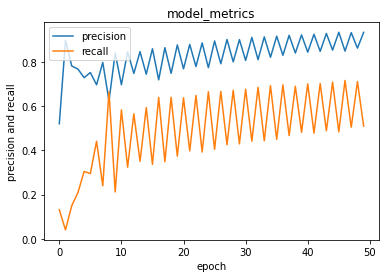

In [65]:
#Plot Precision dan recall dari data train dan test
plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.title('model_metrics')
plt.ylabel('precision and recall')
plt.xlabel('epoch')
plt.legend(['precision', 'recall'], loc='upper left')
plt.show()

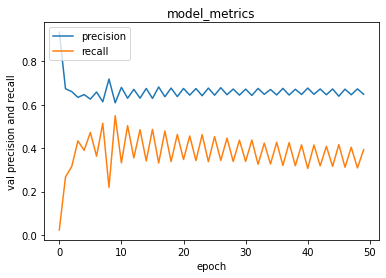

In [66]:
#Plot Val precision dan recall dari data train dan test
plt.plot(history.history['val_precision'])
plt.plot(history.history['val_recall'])
plt.title('model_metrics')
plt.ylabel('val precision and recall')
plt.xlabel('epoch')
plt.legend(['precision', 'recall'], loc='upper left')
plt.show()

In [67]:
#inisiasi variabel baru
book_df = book_new
# Mengambil sample user
user_id = data.UserId.sample(1).iloc[0]
book_visited_by_user = data[data.UserId == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
book_not_visited = book_df[~book_df['isbn'].isin(book_visited_by_user.ISBN.values)]['isbn'] 
book_not_visited = list(
    set(book_not_visited)
    .intersection(set(book_to_book_encoded.keys()))
)

#
book_not_visited = [[book_to_book_encoded.get(x)] for x in book_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_visited), book_not_visited)
)

In [92]:
#meratakan data rating untuk diprediksi
ratings = model.predict(user_book_array).flatten()

#top rating
top_ratings_indices = ratings.argsort()[-10:][::-1]

#rekomendasi buku
recommended_book_ids = [
    book_encoded_to_book.get(book_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Book with high ratings from user')
print('----' * 8)

#mencari rekomendasi buku berdasarkan rating yang diberikan pengguna
top_book_user = (
    book_visited_by_user.sort_values(
        by = 'rate',
        ascending=False
    )
    .ISBN.values
)
 
book_df_rows = book_df[book_df['isbn'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.title, ':', row.publisher)
 
print('----' * 8)
print('Top 10 book recommendation')
print('----' * 8)

#rekomendasi buku
recommended_book = book_df[book_df['isbn'].isin(recommended_book_ids)]
#fungsi perulangan untuk rekomendasi buku sebanyak 10 buah
for row in recommended_book.itertuples():
    print(row.title, ':', row.publisher)

Showing recommendations for users: 271588
Book with high ratings from user
--------------------------------
Bedford Square (Charlotte &amp; Thomas Pitt Novels (Paperback)) : Ballantine Books
--------------------------------
Top 10 book recommendation
--------------------------------
Dragonflight : Ballantine Books
How to Get People to Do Things : Ballantine Books
Fox in Socks (I Can Read It All by Myself Beginner Books) : Random House Children's Books
A Little Princess : HarperCollins
Much Ado About Nothing: With New and Updated Critical Essays and a Revised Bibliography (Shakespeare, William, Works.) : Signet Book
Molly Ivins Can't Say That, Can She? : Random House Inc
Wonder When You'll Miss Me : William Morrow
The World's Shortest Stories of Love and Death: Passion, Betrayal, Suspicion, Revenge, All This and More in a New Collection of Amazing Short Stories-Each One Just 55 Words Long : Running Press Book Publishers
100 Selected Poems by E. E. Cummings : Grove Press
Angels in Americ

Metrik klasifikasi mengukur seberapa baik sistem rekomendasi
dalam mengklasifikasikan item dengan benar. Jarak dari ambang toleransi tidak masalah, tapi orang yang berbeda memiliki toleransi perbedaan. Dengan kata lain, kita tidak dapat berasumsi bahwa peringkat di atas dua bintang sudah cukup baik untuk semua orang [2], [5], [12]. Ambang batas yang lebih masuk akal akan menjadi rata-rata vektor, yaitu, peringkat positif jika lebih besar dari atau sama dengan rata-rata vektor. Ambang batas toleransi menghasilkan skala biner, baik orang tersebut menyukai item (positif) atau tidak (negatif). Demikian juga, rekomendasi bisa benar (true) atau salah (false). Pengikut metrik menghitung jumlah kemunculan setiap prediksi (p) dan nilai aktual (r)

- True Positive (TP): p = positive, r = positive
- False Negative (FN): p = negative, r = positive
- False Positive (FP): p = positive, r = negative
- True Negative (TN): p = negative, r = negative

Precision dan recall merangkum angka-angka ini menjadi lebih banyak metrik intuitif. Precision adalah pecahan dari semua peringkat positif yang diklasifikasikan dengan benar seperti itu. Ini mengukur seberapa baik sistem dalam mengenali rekomendasi positif. Untuk misalnya, Precision 60% berarti bahwa pengguna dapat mengharapkan untuk benar-benar menikmati tiga dari setiap lima rekomendasi. Ingat adalah
sebagian kecil dari semua rekomendasi positif yang sebenarnya
positif. Ini mengukur seberapa baik sistem dalam menemukan positif rekomendasi [4], [10], [24]. Misalnya, Recall 80%
berarti bahwa sistem dapat menebak dengan benar empat dari setiap lima film favorit Anda. 

Meskipun precision dan recall adalah metric yang terpisah, tetapi mereka sebenarnya terkait. Biasanya, presisi tinggi berarti daya ingat rendah dan mengingat tinggi berarti presisi rendah. Salah satu cara populer untuk menggabungkan presisi dan recall menjadi satu metrik adalah menghitung F-measure, yang merupakan rata-rata harmonik dari keduanya. 

Formula:

![](https://i.postimg.cc/CK5DtVJv/image.png)

[Referensi](https://www.huichawaii.org/assets/met_morozov_sergey_2013.pdf)


In [69]:
test_loss = model.evaluate(x_val, y_val)
print('\ nTest Loss: {}'.format(test_loss))

1797/1797 [==============================] - 10s 5ms/step - loss: 0.5931 - precision: 0.6537 - recall: 0.3765
\ nTest Loss: [0.5930659770965576, 0.6536533832550049, 0.3764547109603882]


In [90]:
#Define precission and recall value
precision=0.6537 
recall=0.3765

#count f_measuer
f_measure=2*(precision*recall)/(precision+recall)
print("F Measure =",f_measure)

F Measure = 0.47780634828188695
